In [3]:
import numpy as np
import sys
import math
import itertools
import matplotlib.pyplot as plt  
import networkx as nx
from collections import deque

# Grafos

## 6.1 Introducción

Un grafo $G = (V, X)$ es un par de conjuntos, donde $V$ es un conjunto de **nodos**
y $X$ es un subconjunto del conjunto de pares no ordenados de elementos distintos de V.
* Los elementos de $V$ se llaman **nodos** o **vértices**
* Los elementos de $X$ se llaman aristas, ejes o arcos.
* Dados $v, w ∈ V$, si $e = (v,w) ∈ X$ se dice que `v` y `w` son adyacentes y que `e` es incidente a `v` y `w`.

<img src="grafo_1.png" alt="mm" style="width: 300px;"/>

#### Notación: 

* $n = |V|$
* $m = |X|$

--------

### Multigrafo

grafo en el que puede haber varias aristas entre el mismo par de vértices distintos.

<img src="multigrafo.png" alt="mm" style="width: 300px;"/>

---

### Pseudografo

Un grafo en el que puede haber varias aristas entre cada par de vértices y también puede haber aristas que unan a un vértice con sí mismo (_loops_).

<img src="pseudografo.png" alt="mm" style="width: 300px;"/>

--------

### Grado

El **grado** de un vértice `v` es la cantidad de aristas incidentes a `v`.

#### Notación: 

* `d(v)`: grado de` v`.

Ej: en el pseudografo anterior, $d(u) = 1$ y $d(v) = 3$

#### Teorema

La suma de los grados de los vértices de un grafo es igual a 2 veces el número de aristas. `aplica a multi y pseudos también, no?`

$$
\sum_{i=1}^{n} d(v_{i}) = 2m
$$

#### Ejemplo:

$$ d(u) = 1, \ d(v) = 3 \, \ d(w) = 2 \ d(x) = 3, \ d(y) = 2 \ d(z) = 3 
\newline
\ 
\newline
1+3+2+3+2+3 = 14 = 2m \rightarrow m = 7 $$

Hay $7$ ejes

<img src="grafo_1.png" alt="mm" style="width: 300px;"/>

--------

### Grafo Completo

Un grafo se dice completo si todos los vértices son adyacentes entre sí.

#### Notación

$K_{n}$ es el grafo completo de $n$ vértices.

<img src="grafo_completo.png" alt="mm" style="width: 300px;"/>

### Grafo complemento

Dado un grafo $G = (V, X)$, el grafo complemento tiene el mismo conjunto de vértices y un par de vértices son adyacentes, sí y solo sí, no son adyacentes en $G$.

#### Notación:

$\overline{G}$ es el grafo complemento de $G$.

<img src="grafo_complemento.png" alt="mm" style="width: 300px;"/>

--------

## 6.2 Caminos y Circuitos

### Camino

Un **camino** en un grafo es una sucesión de aristas $e_{1}, e_{2}, ..., e_{k}$
tal que un extremo de $e_{i}$ coincide con uno de $e_{i−1}$ y
el otro con uno de $e_{i+1}$ para $i = 2, ..., k − 1$.

<img src="camino.png" alt="mm" style="width: 400px;"/>

$ \{ (u, v), \ (v, z), \ (z, x), \ (x, w), \ (w, v), \ (v, z) \} $


$ \{ (v, z), \ (w, v), \ (x, w), \ (z, x), \ (v, z), \ (u, v) \} $

### Camino simple

Es un camino que no pasa dos veces por el mismo vértice.

<img src="camino_simple.png" alt="mm" style="width: 400px;"/>

$ \{ (u, v), \ (v, w), \ (w, x), \ (x, z) \} $

$ \{ (z, x), \ (x, w), \ (w, v), \ (v, u) \} $

Caminos equivalentes. No hay direción.

### Circuito

Es un camino que empieza y termina en el mismo vértice.

<img src="camino.png" alt="mm" style="width: 400px;"/>

$ \{ (u, v), \ (v, z), \ (z, x), \ (x, w), \ (w, v), \ (v, u) \} $

$ \{ (u, v), \ (v, w), \ (w, x), \ (x, z), \ (z, v), \ (v, u) \} $

### Circuito simple

Es un circuito de 3 o más vértices que no pasa dos veces por el mismo vértice

<img src="circuito_simple.png" alt="mm" style="width: 400px;"/>

$ \{ (y, x), \ (x, w), \ (w, v), \ (v, z), \ (z, y) \} $

$ \{ (y, z), \ (z, v), \ (v, w), \ (w, x), \ (x, y) \} $

------

### Distancia

#### Longitud

La longitud de un camino es la cantidad de aristas que tiene.

#### Distancia

La distancia entre dos vértices $v$ y $w$ de un grafo se define como
la longitud del camino más corto entre $v$ y $w$.

#### Notación

$d(v,w)$ denota la distancia entre $v$ y $w$.

Para todo vértice v, d(v, v) = 0.

Si no existe camino entre v y w se dice que $d(v,w) = \infty$

**Proposición**: Si un camino $P$ entre $v$ y w tiene longitud $d(v,w)$, $P$ debe ser un camino simple.

#### Propiedades de la función distancia

Para todo $u$, $v$, $w$ pertenecientes a $V$:


* $d(u, v) ≥ 0$ y $d(u, v) = 0$, si y sólo si, $u = v$
* $d(u, v) = d(v, u)$
* $d(u,w) ≤ d(u, v) + d(v,w)$

Si $P$ es un camino entre $u$ y $v$ de longitud $d(u, v)$ y $z,w ∈ P$,
entonces $P_{zw}$ es un camino entre $z$ y $w$ de longitud $d(z,w)$,
donde $P_{zw}$ es el subcamino de $P$ entre $z$ y $w$.

<img src="grafo_distancia.png" alt="mm" style="width: 400px;"/>

La longitud del camino resaltado en amarillo entre $u$ e $y$ no es igual a $d(u, y)$, por lo tanto el subcamino entre $v$ e $y$ tampoco tiene longitud igual a la distancia entre sus nodos $d(v, y)$.

El camino en rojo, sí cumple con nuestra proposición.

----

## 6.3 Más definiciones

### Subgrafo

Dado un grafo $G = (V, X)$, un subgrafo de $G$ es un grafo $H = (V, X)$ tal que:

$V' ⊆ V$ y $X' ⊆ X ∩ (V' × V')$

<img src="grafo_conexo.png" alt="mm" style="width: 800px;"/>

### Subgrafo inducido

Un subgrafo $H = (V', X')$ de $G = (V, X)$, es un subgrafo inducido
si para todo par de vértices $u, v ∈ V'$:

$(u, v) ∈ X ⇐⇒ (u, v) ∈ X$

<img src="subgrafo_inducido.png" alt="mm" style="width: 800px;"/>

2 de estos grafos son subgrafos del primero, pero sólo 1 es subgrafo inducido.

### Grafo Conexo

Un grafo se dice conexo si existe un camino entre todo par de vértices.

### Componente conexa

Una componente conexa de un grafo $G$ es un subgrafo conexo maximal de $G$.

<img src="componente_conexa.png" alt="mm" style="width: 600px;"/>

---

### Grafo Bipartito

Un grafo $G = (V, X)$ se dice bipartito si existe una partición $V_{1}$, $V_{2}$
del conjunto de vértices $V$:

1. $V = V1 ∪ V2$
2. $V1 ∩ V2 = ∅$
3. $V1 \neq ∅$
4. $V2 \neq ∅$

tal que todas las aristas de $G$ tienen un extremo en $V_{1}$ y otro en $V_{2}$.

#### Bifartito completo

Un grafo bipartito con partición $V_{1}$, $V_{2}$,
es bipartito completo si todo vértice en $V_{1}$ es adyacente a todo vértice en $V_{2}$

<img src="bipartito.png" alt="mm" style="width: 600px;"/>

Un grafo bipartito completo, uno bipartito y uno que no es bipartito debido al eje resaltado.

#### Teorema
Un grafo es bipartito, si y sólo si, no tiene circuitos simples de longitud impar.

-----

### Isomorfismo

Dos grafos $G = (V, X)$ y $G' = (V', X')$ se dicen isomorfos si
existe una función biyectiva:

$$f : V → V'$$ 

tal que para todo $v,w ∈ V$:

$$(v,w) ∈ X ⇐⇒ (f (v), f (w)) ∈ X'$$

#### Propiedades de grafos isomorfos

* tienen el mismo número de vértices,
* tienen el mismo número de aristas,
* para todo $k$, $0 ≤ k ≤ n − 1$, tienen el mismo número de vértices de grado $k$
* tienen el mismo número de componentes conexas
* para todo $k$, $1 ≤ k ≤ n − 1$, tienen el mismo número de caminos simples de longitud $k$.

Comprobación de isomorfía

No entendí isomorfía, parecen los mismos grafos pero con los nombres de los nodos cambiados.

----

## 6.4 Representaciones de grafos

### Matrices

#### de adyacencia

$G ∈ \mathbb{R}^{n×m}$ , donde los elementos $g_{ij}$ de $G$ se definen como:

$$ g_{ij} = 
 \begin{cases}
1, \qquad \text{si } G \text{ tiene una arista entre los vértices } i \text{ y } j
\newline
0, \qquad \text{si no}
\end{cases} $$

$$ G = 
\begin{bmatrix}
& 0  & 0  & 1  & 1  & \\
& 0  & 0  & 1  & 1  & \\
& 1  & 1  & 0  & 1  & \\
& 1  & 1  & 1  & 1  & \\
\end{bmatrix}$$

$$ G = 
\begin{bmatrix}
& 1  & 0  & 0  & 0  & 0 & 1  & 0  & \\
& 0  & 0  & 0  & 1  & 1 & 0  & 0  & \\
& 1  & 1  & 1  & 0  & 1 & 0  & 0  & \\
& 0  & 1  & 1  & 1  & 0 & 1  & 1 & \\
\end{bmatrix}$$

$G ∈ \mathbb{R}^{m×n}$ , donde los elementos $g_{ij}$ de $G$ se definen como:

$$ g_{ij} = 
 \begin{cases}
1, \qquad \text{si la arista } i \text{ es incidente al vértice } j
\newline
0, \qquad \text{si no}
\end{cases} $$

#### Teorema

### esto no lo entendí
Teorema. Si A es la matriz de adyacencia del grafo G , el
elemento aij k de Ak es igual a la cantidad de caminos de longitud k
entre i y j.
Corolario. aii 2 = d(vi ).


### Lista de adyacencia

Lista de todas las adyacencias de un grafo. Una colección de listas desordenadas, donde cada lista contiene todos los vértices adyacentes a un vértice.

<img src="grafo_3.png" alt="mm" style="width: 800px;"/>

Notar que las implementaciones no están definidas. Las matrices pueden ser arrays de arrays, las listas pueden ser listas de arrays, o de listas, o diccionarios de...

----

## 6.5 Digrafos

Un grafo orientado o digrafo $G = (V, X)$ es un par de conjuntos $V$ y $X$ donde $V$ es el conjunto de vértices o nodos y $X$ es un subconjunto del conjunto de los pares ordenados de $V$.

### Grado de entrada

El grado de entrada $d_{in}(v)$ de un nodo $v$ de un grafo orientado es la cantidad de arcos que llegan a $v$. Es decir, la cantidad de arcos que tienen a $v$ como segundo elemento.

### Grado de salida

El grado de salida $d_{out}(v)$ de un nodo $v$ de un grafo orientado es la cantidad de arcos que salen de $v$. Es decir, la cantidad de arcos que tienen a $v$ como primer elemento

<img src="grafo_4.png" alt="mm" style="width: 800px;"/>

### Camino orientado

Un camino orientado en un digrafo es una sucesión de arcos $e_{1}, e_{2} ... e_{k}$ tal que el primer elemento del par $e_{i}$ coincide con el segundo de $e_{i−1}$ y el segundo elemento de $e_{i}$ con el primero de $e_{i+1}$.

<img src="camino_orientado.png" alt="mm" style="width: 400px;"/>

$ \{ (u, v), \ (v, w), \ (w, x), \ (x, z) \} $

### Circuito orientado

Un cicuito orientado en un grafo orientado es un camino orientado que comienza y termina en el mismo nodo.
Por obvias razones, no hay diferenciación entre circuito y circuito simple, son todos simples.

<img src="circuito_orientado.png" alt="mm" style="width: 400px;"/>

$ \{ (y, x), \ (x, w), \ (w, v), \ (v, z), \ (z, y) \} $

### Componente fuertemente conexo

Un digrafo se dice fuertemente conexo si para todo par de nodos $u$, $v$ existe un camino orientado de $u$ a $v$ y otro de $v$ a $u$

<img src="componente_fuertemente_conexa.png" alt="mm" style="width: 600px;"/>

-------

Conociendo ya distintos tipos de grafos y algunas de sus características y propiedades, veremos ahora, y en las siguientes unidades, los principales algoritmos utilizados para explorar grafos, caracterizarlos y extraerles información.

## 6.6 _Breadth First Search_

BFS (búsqueda en amplitud), es un algoritmo _greedy_ que expande la frontera de vértices conocidos uniformemente, en niveles, a partir de un nodo fuente (_source_) `S`. El algoritmo descubre todos los vértices a una distancia $k$ de `S` antes de descubrir cualquier vértice a una distancia $k+1$.

Para ir guardando su progreso, BFS debe ir anotando que nodos fueron visitados y cuales no. Hay 2 formas de hacer esto:

* `True/False`: empezaremos utilizando la forma más simple de hacerlo. Los nodos tendrán un atributo booleano llamado `visitado`. Una alternativa a esto es tener una estructura de datos aparte (diccionario o matriz), con 1 booleano por cada nodo que indique el mismo dato. Estas alternativas son conocidas como _Structure of Arrays_ y _Array of Structures_ (SoA vs. AoS).
* `Blanco/Gris/Negro`: esta nomenclatura utiliza el Cormen y aporta un valor intermedio (el Gris), que junto con el negro son equivalentes al valor `True`. Los nodos que no han sido explorados por el algoritmo son considerados `Blanco` (equivalente a `False`), aquellos que han sido visitados, pero cuyos nodos adyacentes no hayan sido visitados en su totalidad son `Gris` y aquellos nodos que hayan sido explorados totalmente, es decir, visitados y sus adyacentes visitados también, serán `Negro`. Esto se almacena en una variable `color`, que también podría ser un atributo de los nodos, o encontrarse en otra estructura de datos.

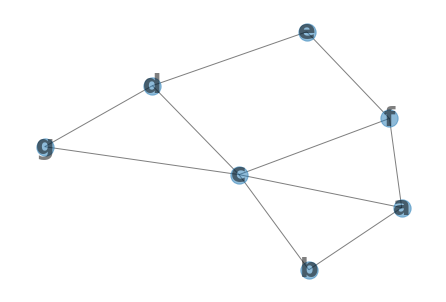

In [73]:
G = nx.Graph()
G.add_nodes_from(["a", "b","c", "d", "e", "f", "g"])
G.add_edges_from([("a", "b"), ("a", "c"), ("a", "f"), ("c", "d"), 
("d", "e"), ("c", "b"), ("f", "e"), ("c", "f"), ("c", "g"), ("d", "g") ])
nx.draw(G, with_labels = True, alpha = .5, font_size = 26, font_weight = 'bold')

In [74]:
def bfs(G, s):
    for v in G.nodes():
        G.nodes[v]["visitado"] = False
        G.nodes[v]["predecesor"] = False
        G.nodes[v]["distancia"] = np.inf
    G.nodes[s]["visitado"] = True
    G.nodes[s]["predecesor"] = False
    G.nodes[s]["distancia"] = 0
    cola = deque()
    cola.append(s)
    while len(cola) != 0:
        u = cola.pop()
        for v in G[u]:
            if G.nodes[v]["visitado"] == False:
                G.nodes[v]["visitado"] = True
                G.nodes[v]["distancia"] = G.nodes[u]["distancia"] + 1
                G.nodes[v]["predecesor"] = u
                cola.appendleft(v)

### Árboles BFS

Al anotar predecesores, BFS está construyendo, implicitamente, un **subgrafo de predecesores**, que será un árbol, (que en caso de que sea dirigido se llamará DAG, _Directed Acyclic Graph_), que contendrá a todos los nodos del grafo original y los ejes que el algoritmo haya atravesado, para llegar a ellos. Eso implica la eliminación de los ejes que no fueron atravesados, eliminando así los potenciales ciclos que existan.

El árbol resultante de un grafo no es una característica propia del grafo. La topología del árbol resultante dependerá de:
1. el grafo a explorar
2. el algoritmo utilizado (BFS o DFS)
3. el nodo fuente

In [75]:
def bfs_arbol(G, s):
    A = nx.Graph()
    for v in G.nodes():
        G.nodes[v]["visitado"] = False
        G.nodes[v]["predecesor"] = False
        G.nodes[v]["distancia"] = np.inf
    G.nodes[s]["visitado"] = True
    G.nodes[s]["predecesor"] = False
    G.nodes[s]["distancia"] = 0
    cola = deque()
    cola.append(s)
    while len(cola) != 0:
        u = cola.pop()
        A.add_node(u)
        for v in G[u]:
            if G.nodes[v]["visitado"] == False:
                G.nodes[v]["visitado"] = True
                G.nodes[v]["distancia"] = G.nodes[u]["distancia"] + 1
                G.nodes[v]["predecesor"] = u
                cola.appendleft(v)
                A.add_node(v)
                A.add_edge(u, v)
    return A

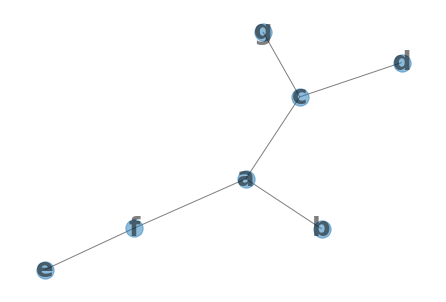

In [76]:
A = bfs_arbol(G, "a")
nx.draw(A, with_labels = True, alpha = .5, font_size = 26, font_weight = 'bold')

In [78]:
G.nodes["g"]

{'visitado': True, 'predecesor': 'c', 'distancia': 2}

Veamos como varía el árbol según el nodo fuente

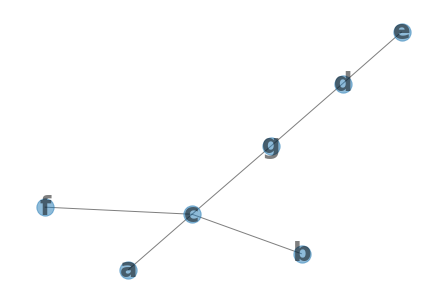

In [79]:
A = bfs_arbol(G, "g")
nx.draw(A, with_labels = True, alpha = .5, font_size = 26, font_weight = 'bold')

In [80]:
G.nodes["g"]

{'visitado': True, 'predecesor': False, 'distancia': 0}

### Complejidad temporal

BFS inicializa los vértices y eso tiene una complejidad de $\Theta(n+m)$. Luego, evalua todas las adyacencias, terminen éstas o no en el árbol BFS, y esa operación tiene un tiempo de ejecución de $\Theta(m)$. Así, su complejidad es de $\Theta(n+m)$

### _Shortest Paths_, Caminos Óptimos

BFS halla el camino de largo igual a la distancia entre todo nodo y el nodo fuente. Es decir, el camino más corto, el que atraviesa menos ejes para llegar a los vértices.
Así, el nodo fuente tendrá una distancia de $0$ y todos los nodos a los que no se puedan acceder desde el nodo fuente, tendrán asignada una distancia igual a $\infty$.

## 6.7 _Depth First Search_

DFS (búsqueda en profundidad), es un algoritmo de _backtracking_ que busca profundizar en las adyacencias de los nodos inmediatamente luego de ser descubiertos, una vez que se queda sin nuevos nodos por explorar, el algoritmo retrocede (hace _backtrack_), para buscar un nuevo nodo a través del cual profundizar de nuevo.

Esta forma de explorar el grafo le impide determinar las distancias mínimas al nodo fuente de forma práctica, pero le permite obtener otro tipo de información del grafo, la **estructura de paréntesis** del grafo, información relativa a las descendencias de los nodos.

Para obtener esta información, DFS cambia la noción de distancia, por la de tiempo. DFS lleva un "cronómetro" que marca el tiempo y anota ese tiempo en cada nodo que visita. Así, reemplaza el atributo de `distancia`, por 2 atributos: `inicio` y `fin`. El primero marca el tiempo en el que el nodo fue descubierto (visitado por primera vez), y el segundo marca el tiempo en el que el algoritmo vuelve al nodo, haciendo _backtrack_, habiendo explorado todos sus descendientes.

El tiempo de `inicio` de un nodo `u` representa el "paréntesis izquierdo" y el de `fin` el "paréntesis derecho", todos los nodos que estén dentro de esos paréntesis, serán descendientes de ese nodo `u`. Veamos un ejemplo.

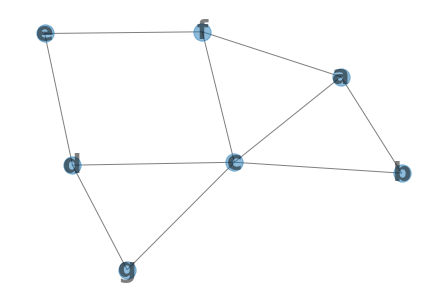

In [4]:
G = nx.Graph()
G.add_nodes_from(["a", "b","c", "d", "e", "f", "g"])
G.add_edges_from([("a", "b"), ("a", "c"), ("a", "f"), ("c", "d"), 
("d", "e"), ("c", "b"), ("f", "e"), ("c", "f"), ("c", "g"), ("d", "g") ])
nx.draw(G, with_labels = True, alpha = .5, font_size = 26, font_weight = 'bold')

In [34]:
def dfs_visita(G, u, t):
    t += 1
    G.nodes[u]["inicio"] = t
    G.nodes[u]["visitado"] = True
    
    for v in G[u]:
        if G.nodes[v]["visitado"] == False:
            G.nodes[v]["predecesor"] = u
            t = dfs_visita(G, v, t)
    t += 1
    G.nodes[u]["fin"] = t
    return t

def dfs(G):
    for v in G.nodes():
        G.nodes[v]["visitado"] = False
        G.nodes[v]["predecesor"] = False
        G.nodes[v]["inicio"] = np.inf
        G.nodes[v]["fin"] = np.inf
    t = 0
    for s in G.nodes():
        if G.nodes[s]["visitado"] == False:
            t = dfs_visita(G, s, t)

### Árboles DFS

Al igual que BFS, DFS anota el predecesor de cada nodo que visita, construyendo así el subgrafo de predecesores. El árbol DFS y que como ya habíamos anticipado, será distinto del árbol BFS, aún así se aplique al mismo grafo y parta desde el mismo nodo fuente.

In [70]:
def dfs_visita_arbol(G, u, t, A):
    t += 1
    G.nodes[u]["inicio"] = t
    G.nodes[u]["visitado"] = True
    
    
    for v in G[u]:
        if G.nodes[v]["visitado"] == False:
            A.add_node(v)
            A.add_edge(u, v)
            G.nodes[v]["predecesor"] = u
            t = dfs_visita_arbol(G, v, t, A)
    t += 1
    G.nodes[u]["fin"] = t
    return t

def dfs_arbol(G):
    A = nx.Graph()
    for v in G.nodes():
        G.nodes[v]["visitado"] = False
        G.nodes[v]["predecesor"] = False
        G.nodes[v]["inicio"] = np.inf
        G.nodes[v]["fin"] = np.inf
    t = 0
    for s in G.nodes():
        if G.nodes[s]["visitado"] == False:
            A.add_node(s)
            t = dfs_visita_arbol(G, s, t, A)
    return A

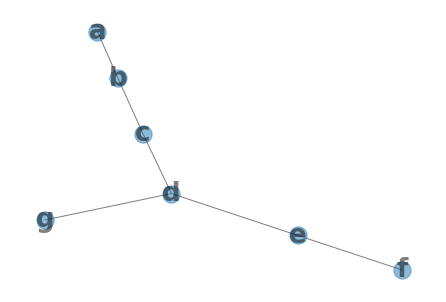

In [62]:
A = dfs_arbol(G)
nx.draw(A, with_labels = True, alpha = .5, font_size = 26, font_weight = 'bold')

Los nodos `f` y `g` tienen tiempos de `inicio` y `fin` consecutivos (sus paréntesis están uno al lado del otro), esto indica que son las hojas del árbol, no tienen nodos adyacentes que no hayan sido descubiertos anteriormente.

In [63]:
G.nodes["f"]

{'visitado': True, 'predecesor': 'e', 'inicio': 6, 'fin': 7, 'distancia': 6}

In [64]:
G.nodes["g"]

{'visitado': True, 'predecesor': 'd', 'inicio': 9, 'fin': 10, 'distancia': 5}

Vemos a sus predecesores:

In [65]:
G.nodes["e"]

{'visitado': True, 'predecesor': 'd', 'inicio': 5, 'fin': 8, 'distancia': 5}

In [66]:
G.nodes["d"]

{'visitado': True, 'predecesor': 'c', 'inicio': 4, 'fin': 11, 'distancia': 4}

Y finalmente, el nodo fuente:

In [67]:
G.nodes["a"]

{'visitado': True, 'predecesor': False, 'inicio': 1, 'fin': 14, 'distancia': 1}

Y si agregamos un nodo al que el nodo fuente no puede llegar?

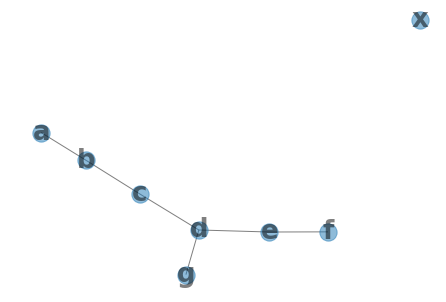

In [71]:
G.add_node("x")
A = dfs_arbol(G)
nx.draw(A, with_labels = True, alpha = .5, font_size = 26, font_weight = 'bold')

In [72]:
G.nodes["x"]

{'visitado': True, 'predecesor': False, 'inicio': 15, 'fin': 16}

### Complejidad temporal

Al igual que BFS, DFS inicializa los vértices y eso tiene una complejidad de $\Theta(n+m)$. Luego, evalua todas las adyacencias, terminen éstas o no en el árbol DSF, y esa operación tiene un tiempo de ejecución de $\Theta(m)$. Así, su complejidad es de $\Theta(n+m)$

### Bosques BFS y DFS

Qué sucede si el digrafo a explorar no es un componente fuertemente conexo, o si no se pueden alcanzar todos los nodos desde el nodo fuente?

Deberíamos buscar crear **bosques**, colecciones de árboles BFS o DFS, y así explorar todo el grafo.

Vimos un algoritmo DFS que se ocupa de eso, cómo modificaría el algoritmo de BFS para que haga lo mismo?

## 6.6 Conclusión

* Aprovechen esta notebook, jueguen **mucho** con BFS y DFS. Hagan sus propios grafos, predigan los árboles y atributos (`distancia` o `inicio` y `fin`) resultantes y comprueben sus predicciones.
* Leer del Cormen: **p(586-620)**

--------------------

### Contenidos a explicar durante la práctica

1. Implementaciones de las distintas representaciones de grafos
2. Complejidades al utilizar las distintas representaciones de grafos
3. Ciclos en grafos y su detección
4. Componentes conexos y su determinación
5. Caminos y su determinación
6. Conceptos de maximal y minimal